<h1>Section 1: Dataset</h1>
Cricket is a sport (similar to baseball but very different) which is a religion in India. I have been the biggest cricket fan for as long as I can remember. Having played at the professional level back in India for about 5 years, this was the first topic that I thought of to analyze and discover trends in cricket since its inception. In this project I will be exploring the ODI statistics of batsmen over the years. ODI is a format of the game which lasts for a day where each side, consisting of 11 players each attempt to outscore each other facing 300 balls each. The 300 balls are divided into 50 'overs' i.e. 6 balls an over. Runs can be scored either by running on what is known as the pitch after hitting the ball or if the boundary is cleared. If the batsman clears the boundary without touching the ground he is awarded 6 runs, while if it touches the ground he is awarded 4 runs. A batsmen is declared 'out' if the ball is caught by the fielder or it hits the wicket (stumps), placed behind the batsman. I found this dataset from kaggle.

In [341]:
import pandas as pd 
df = pd.read_csv("ODI_batting_data.csv")
df


,Unnamed: 0,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Career Runs,Strike Rate,100s,50s,0s,Unnamed: 13
0,27,Anwar Hossain Monir (BDESH),2002-2002,1,1,1,0,0*,-,8,0,0,0,0,NaN
1,33,BP Bracewell (NZ),1978-1978,1,1,1,0,0*,-,4,0,0,0,0,NaN
2,2,OC McCoy (WI),2018-2018,2,1,1,0,0*,-,1,0,0,0,0,NaN
3,5,JP Millmow (NZ),1990-1990,5,1,1,0,0*,-,3,0,0,0,0,NaN
4,8,D Mohammed (WI),2006-2008,7,1,1,0,0*,-,2,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,35,Tanvir Mehdi (PAK),1992-1992,1,1,0,0,0,0,5,0,0,0,1,NaN
2496,37,R Walters (NAM),2003-2003,2,2,0,0,0,0,5,0,0,0,2,NaN
2497,38,CM Willoughby (SA),2000-2003,3,2,0,0,0,0,4,0,0,0,2,NaN
2498,39,Zakir Hossain (BDESH),1998-1998,1,1,0,0,0,0,1,0,0,0,1,NaN


We can see that certain cells are not formatted as they should be (certain int types are str types, unnecessairly columns exist) before we proceed with our data analysis we must clean the dataframe. 

In [342]:
#dropping irrevelant columns 
df = df.drop('Unnamed: 13', axis = 1)
df = df.drop('Unnamed: 0', axis = 1) 
df = df.drop('Career Runs', axis = 1) #already a ODI runs or just runs column exists
df

,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,Anwar Hossain Monir (BDESH),2002-2002,1,1,1,0,0*,-,0,0,0,0
1,BP Bracewell (NZ),1978-1978,1,1,1,0,0*,-,0,0,0,0
2,OC McCoy (WI),2018-2018,2,1,1,0,0*,-,0,0,0,0
3,JP Millmow (NZ),1990-1990,5,1,1,0,0*,-,0,0,0,0
4,D Mohammed (WI),2006-2008,7,1,1,0,0*,-,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Tanvir Mehdi (PAK),1992-1992,1,1,0,0,0,0,0,0,0,1
2496,R Walters (NAM),2003-2003,2,2,0,0,0,0,0,0,0,2
2497,CM Willoughby (SA),2000-2003,3,2,0,0,0,0,0,0,0,2
2498,Zakir Hossain (BDESH),1998-1998,1,1,0,0,0,0,0,0,0,1


Since we only want to concern ourselves with data with the regards to batsman, we must also remove data concerning players who have never batted, i.e. their innings are 0. We also need to remove batsman with a strike rate of '-' as that means they never faced any balls (Strike rate is defined as the runs scored per ball)

In [343]:
df_batsman = df[df['Inns'] != '-']
df_batsman = df_batsman[df_batsman['Strike Rate'] != '-']
df_batsman = df_batsman[df_batsman['Ave'] != '-'] #removing such batsman as well as they only played 1 innings and remained not out (outliers)
df_batsman

,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
130,MP O'Dowd (NL),2019-2019,2,2,1,145,86*,145,72.5,0,2,0
131,AL Kandappah (CAN),2007-2007,2,2,1,97,69*,97,62.17,0,1,0
132,Aamer Yamin (PAK),2015-2018,4,3,2,95,62,95,98.95,0,1,0
133,KJ Barnett (ENG),1988-1988,1,1,0,84,84,84,57.53,0,1,0
134,CT Radley (ENG),1978-1978,4,4,1,250,117*,83.33,68.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,GS Sobers (WI),1973-1973,1,1,0,0,0,0,0,0,0,1
2495,Tanvir Mehdi (PAK),1992-1992,1,1,0,0,0,0,0,0,0,1
2496,R Walters (NAM),2003-2003,2,2,0,0,0,0,0,0,0,2
2497,CM Willoughby (SA),2000-2003,3,2,0,0,0,0,0,0,0,2


In [344]:
#checking data types of all columns 
df_batsman.dtypes

Player         object
Span           object
Mat             int64
Inns           object
Not Outs       object
Runs           object
Highest Sc     object
Ave            object
Strike Rate    object
100s           object
50s            object
0s             object
dtype: object

In [345]:
#coverting required colums to int data types
#highest score
df_batsman['Highest Sc'] = df['Highest Sc'].replace('\*', '', regex=True)  #removing * sign from highest score which indicates that they remained Not Out before converting to an int type

<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
C:\Users\udito\AppData\Local\Temp\ipykernel_51704\2962857020.py:3: SyntaxWarning: invalid escape sequence '\*'
  df_batsman['Highest Sc'] = df['Highest Sc'].replace('\*', '', regex=True)  #removing * sign from highest score which indicates that they remained Not Out before converting to an int type


In [346]:
df_batsman['Highest Sc'] = df_batsman['Highest Sc'].astype(int)
df_batsman

,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
130,MP O'Dowd (NL),2019-2019,2,2,1,145,86,145,72.5,0,2,0
131,AL Kandappah (CAN),2007-2007,2,2,1,97,69,97,62.17,0,1,0
132,Aamer Yamin (PAK),2015-2018,4,3,2,95,62,95,98.95,0,1,0
133,KJ Barnett (ENG),1988-1988,1,1,0,84,84,84,57.53,0,1,0
134,CT Radley (ENG),1978-1978,4,4,1,250,117,83.33,68.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,GS Sobers (WI),1973-1973,1,1,0,0,0,0,0,0,0,1
2495,Tanvir Mehdi (PAK),1992-1992,1,1,0,0,0,0,0,0,0,1
2496,R Walters (NAM),2003-2003,2,2,0,0,0,0,0,0,0,2
2497,CM Willoughby (SA),2000-2003,3,2,0,0,0,0,0,0,0,2


In [347]:
#Innings
df_batsman['Inns'] = df_batsman['Inns'].astype(int)


In [350]:
#df_batsman.dtypes
#NotOuts
df_batsman['Not Outs'] = df_batsman['Not Outs'].astype(int)

In [351]:
#runs
df_batsman['Runs'] = df_batsman['Runs'].astype(int)

In [352]:
#100s
df_batsman['100s'] = df_batsman['100s'].astype(int)

#50s
df_batsman['50s'] = df_batsman['50s'].astype(int)

#0s
df_batsman['0s'] = df_batsman['0s'].astype(int)

In [353]:
#Strike Rate
df_batsman['Strike Rate'] = df_batsman['Strike Rate'].astype(float)

In [354]:
#Average
df_batsman['Ave'] = df_batsman['Ave'].astype(float)

In [355]:
df_clean_batsman = df_batsman
df_clean_batsman

,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
130,MP O'Dowd (NL),2019-2019,2,2,1,145,86,145.00,72.50,0,2,0
131,AL Kandappah (CAN),2007-2007,2,2,1,97,69,97.00,62.17,0,1,0
132,Aamer Yamin (PAK),2015-2018,4,3,2,95,62,95.00,98.95,0,1,0
133,KJ Barnett (ENG),1988-1988,1,1,0,84,84,84.00,57.53,0,1,0
134,CT Radley (ENG),1978-1978,4,4,1,250,117,83.33,68.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,GS Sobers (WI),1973-1973,1,1,0,0,0,0.00,0.00,0,0,1
2495,Tanvir Mehdi (PAK),1992-1992,1,1,0,0,0,0.00,0.00,0,0,1
2496,R Walters (NAM),2003-2003,2,2,0,0,0,0.00,0.00,0,0,2
2497,CM Willoughby (SA),2000-2003,3,2,0,0,0,0.00,0.00,0,0,2


df_clean_batsman is the final data we will be working with to analyze batting trends in cricket over the years.

<h1> Section 2: Exploratory Data Analysis </h1>
I will be conducting a data analysis to figure out who are the GOAT (Greatest of all time) ODI batsmen in the history of cricket. This is not necessairily a broad overview but will provide us with some context to the data

<h3> 2.1 Finding the batsman with the most hundreds </h3>
We will be filtering out the 10 batsman with the most hundreds 

In [356]:
df_hundreds = df_clean_batsman.nlargest(10, '100s').reset_index()
df_hundreds

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,200,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,86.23,49,96,20
1,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
2,224,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,80.39,30,82,20
3,170,RG Sharma (INDIA),2007-2019,221,214,32,8944,264,49.14,88.88,28,43,13
4,447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.20,28,68,34
5,169,HM Amla (SA),2008-2019,181,178,14,8113,159,49.46,88.39,27,39,4
6,155,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.50,101.09,25,53,7
7,231,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,78.86,25,93,15
8,300,CH Gayle (ICC/WI),1999-2019,301,294,17,10480,215,37.83,87.19,25,54,25
9,243,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,73.70,22,72,16


<h3> 2.2 Finding the batsman with the most runs </h3>
We will be filtering out the 10 batsman with the most runs

In [357]:
df_runs = df_clean_batsman.nlargest(10, 'Runs').reset_index()
df_runs

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,200,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,86.23,49,96,20
1,231,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,78.86,25,93,15
2,224,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,80.39,30,82,20
3,447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.20,28,68,34
4,416,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,78.96,19,77,28
5,271,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137,39.52,74.24,10,83,20
6,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
7,206,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,72.89,17,86,17
8,243,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,73.70,22,72,16
9,279,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,71.24,12,83,13


<h3> 2.3 Finding the batsman with the most ducks (most times out without scoring a run) </h3>
We will be filtering out the 10 batsman with the most ducks

In [358]:
df_0s = df_clean_batsman.nlargest(10, '0s').reset_index()
df_0s

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.20,28,68,34
1,856,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,117.00,6,39,30
2,416,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,78.96,19,77,28
3,1292,Wasim Akram (PAK),1984-2003,356,280,55,3717,86,16.52,88.33,0,6,28
4,2047,SL Malinga (SL),2004-2019,226,119,36,567,56,6.83,74.50,0,1,26
5,300,CH Gayle (ICC/WI),1999-2019,301,294,17,10480,215,37.83,87.19,25,54,25
6,1505,WPUJC Vaas (Asia/SL),1994-2008,322,220,72,2025,50,13.68,72.42,0,1,25
7,2051,M Muralitharan (Asia/ICC/SL),1993-2011,350,162,63,674,33,6.80,77.56,0,0,25
8,938,RS Kaluwitharana (SL),1990-2004,189,181,14,3711,102,22.22,77.70,2,23,24
9,1235,DL Vettori (ICC/NZ),1997-2015,295,187,57,2253,83,17.33,82.98,0,4,23


<h3> 2.4 Finding the GOAT ('Greatest of All Time') Batsmen </h3>
It is hard to objectively define GOAT. But based on the data available we will be picking the top batsmen (the GOATS) based on if they make the top 10 hundreds list, top 10 runs list, and are not in the top 10 ducks list

In [359]:
df_temp = pd.merge(df_hundreds, df_runs) #intersection between most runs, most hundreds
df_temp

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,200,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,86.23,49,96,20
1,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
2,224,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,80.39,30,82,20
3,447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.20,28,68,34
4,231,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,78.86,25,93,15
5,243,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,73.70,22,72,16


In [360]:
df_temp2 = pd.merge(df_temp, df_0s) #finding players with most runs and hundreds with also the most number of ducks (most number of times got out on 0)
df_temp2

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.2,28,68,34


We observe that there is only one player we must remove from our intersection of runs and hundreds to make our GOAT list.

In [361]:
df_GOAT = df_temp[df_temp['Player'] != 'ST Jayasuriya (Asia/SL)'].reset_index()
df_GOAT

,level_0,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,0,200,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,86.23,49,96,20
1,1,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
2,2,224,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,80.39,30,82,20
3,4,231,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,78.86,25,93,15
4,5,243,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,73.70,22,72,16


df_GOAT is the dataframe which contains the top 5 best ODI batsmen to have ever played cricket. 

Interesting Side Note: Earlier I had also taken into average (consistency of scoring runs) into account as well while filtering to get the GOAT dataframe. But the only value left was that of Virat Kohli (who happens to be my idol and favorite player). It seemed a little biased and unfair to keep only one player in the final dataframe, hence I changed the parameters. But, luckily for me, my favorite player, objectively speaking, is the GOAT :)

<h1> Section 3: Exploratory Data Visualization </h1>
We will be create a bar chart for players with the most ODI games played, essentially measuring longevity and consistency of players. Since making the bar chart for all batsmen would be extremely tough we will making this chart only for batsman with top 10 with most matches played till 2019 (dataset updated only till 2019).


<BarContainer object of 10 artists>

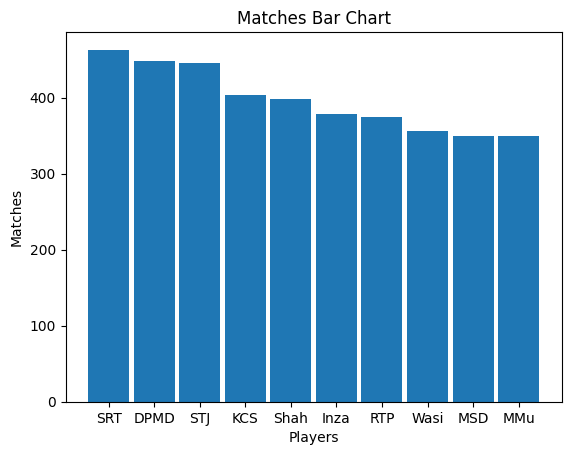

In [362]:
import matplotlib.pyplot as plt
df_matches = df_clean_batsman.nlargest(10, 'Mat')
df_matches['Player_short'] = df_matches['Player'].str[:4]
df_matches['Player_short'] = df_matches['Player_short'].str.replace(' ', '')
plt.title('Matches Bar Chart')
plt.xlabel('Players')
plt.ylabel('Matches')
plt.bar(df_matches['Player_short'], df_matches['Mat'], width = 0.9)


In [363]:
df_matches

,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s,Player_short
200,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,86.23,49,96,20,SRT
416,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,78.96,19,77,28,DPMD
447,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,91.20,28,68,34,STJ
231,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,78.86,25,93,15,KCS
856,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,117.00,6,39,30,Shah
271,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137,39.52,74.24,10,83,20,Inza
224,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,80.39,30,82,20,RTP
1292,Wasim Akram (PAK),1984-2003,356,280,55,3717,86,16.52,88.33,0,6,28,Wasi
165,MS Dhoni (Asia/INDIA),2004-2019,350,297,84,10773,183,50.57,87.56,10,73,10,MSD
2051,M Muralitharan (Asia/ICC/SL),1993-2011,350,162,63,674,33,6.80,77.56,0,0,25,MMu


Based on the bar chart and the filtered loaded dataset we can see that the most consistent player was Sachin Tendulkar from India. We also notice that the top 10 players have played a minimum of 350 games. Another interesting to note that from the top 10, 8 are Asian (4 from Sri Lanka, 2 from India and 2 from Pakistan)

<h1>Section 4: Data Science </h1>
A cricket team is composed of 11 players. An ideal cricket team would have 5 good batsmen, 5 good bowlers, and a good all rounder (who can bat and bowl). Since we do not have bowling data we will answer the question of what an ideal batting 11 would like. The answer is much more complex than you think. A ideal batting eleven would not only consist of the players who have scored runs consistently but we must take into account how quickly they scored those runs, i.e., the Strike rate of the batsman would also come into play. In my opinion, a high quality only batting eleven would consist of 7 players who have scored an average of 38 runs a game and 4 players having a career strike rate of 75 or over (throughout their career they scored atleast 3 runs every 4 balls). Such batsman are known as finishers, as they can score runs quickly at the end. It will be extremely simple to answer this question through python as we just need to filter out the batsman according to the parameters set above.

In [364]:
df_decent_batsman = df_clean_batsman[df_clean_batsman['Ave'] >= 38].reset_index()
df_decent_batsman


,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,130,MP O'Dowd (NL),2019-2019,2,2,1,145,86,145.00,72.50,0,2,0
1,131,AL Kandappah (CAN),2007-2007,2,2,1,97,69,97.00,62.17,0,1,0
2,132,Aamer Yamin (PAK),2015-2018,4,3,2,95,62,95.00,98.95,0,1,0
3,133,KJ Barnett (ENG),1988-1988,1,1,0,84,84,84.00,57.53,0,1,0
4,134,CT Radley (ENG),1978-1978,4,4,1,250,117,83.33,68.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,292,MD Crowe (NZ),1982-1995,143,140,18,4704,107,38.55,72.63,4,34,3
163,293,SO Hetmyer (WI),2017-2019,43,40,3,1416,139,38.27,107.02,5,4,2
164,294,PN Kirsten (SA),1991-1994,40,40,6,1293,97,38.02,56.02,0,9,0
165,295,FM Engineer (INDIA),1974-1975,5,4,1,114,54,38.00,58.46,0,1,0


In [365]:
df_decent_finisher = df_clean_batsman[df_clean_batsman['Strike Rate'] >= 75].reset_index()
df_decent_finisher

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,132,Aamer Yamin (PAK),2015-2018,4,3,2,95,62,95.00,98.95,0,1,0
1,135,T Bavuma (SA),2016-2017,2,2,0,161,113,80.50,94.70,1,0,0
2,136,HE van der Dussen (SA),2019-2019,18,14,5,664,95,73.77,81.87,0,7,0
3,139,RN ten Doeschate (NL),2006-2011,33,32,9,1541,119,67.00,87.70,5,9,1
4,141,PD McGlashan (NZ),2009-2009,4,2,1,63,56,63.00,123.52,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2390,Usman Shinwari (PAK),2017-2019,17,4,1,6,6,2.00,85.71,0,0,2
704,2391,K Kamyuka (CAN),2013-2013,2,1,0,2,2,2.00,100.00,0,0,0
705,2392,Masood Iqbal (PAK),1984-1984,1,1,0,2,2,2.00,100.00,0,0,0
706,2393,ACL Richards (WI),2007-2007,1,1,0,2,2,2.00,100.00,0,0,0


Upon looking at the dataframes we see an obvious error that has been made, we must take into account the number of inings played by a batsman and choose only those who have played a decent amount of innings in order to ensure we pick consistent and decent batsman. For this, we will be adding an additional constraint of a minimum of 125 innings played for both finishers and our consistent batsmen.

In [366]:
df_decent_batsman = df_decent_batsman[df_decent_batsman['Inns'] >= 125]
df_top_batsman = df_decent_batsman.nlargest(7, 'Ave')
df_top_batsman #df with our top 7 of the batting 11

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
15,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
24,154,MG Bevan (AUS),1994-2004,232,196,67,6912,108,53.58,74.16,6,46,5
25,155,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.50,101.09,25,53,7
33,163,JE Root (ENG),2013-2019,143,135,21,5856,133,51.36,87.37,16,33,4
35,165,MS Dhoni (Asia/INDIA),2004-2019,350,297,84,10773,183,50.57,87.56,10,73,10
39,169,HM Amla (SA),2008-2019,181,178,14,8113,159,49.46,88.39,27,39,4
40,170,RG Sharma (INDIA),2007-2019,221,214,32,8944,264,49.14,88.88,28,43,13


In [367]:
df_decent_finisher = df_decent_finisher[df_decent_finisher['Inns'] >= 125]
df_top_finisher = df_decent_finisher.nlargest(4, 'Strike Rate')
df_top_finisher #df with our rest 4 of the batting 11

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
345,856,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,117.00,6,39,30
423,1088,NLTC Perera (SL),2009-2019,161,128,16,2210,140,19.73,111.67,1,10,11
142,365,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,104.33,15,38,14
12,155,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.50,101.09,25,53,7


We now run into another problem where AB de Villers is present in both dataframes, therefore in my opinion for our 11 we will be adding an extra finisher to strengthen the striking ability at the end of an innings for our 11.

In [368]:
df_top_finisher = df_decent_finisher.nlargest(5, 'Strike Rate')
df_top_finisher

,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
345,856,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,117.00,6,39,30
423,1088,NLTC Perera (SL),2009-2019,161,128,16,2210,140,19.73,111.67,1,10,11
142,365,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,104.33,15,38,14
12,155,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.50,101.09,25,53,7
128,339,AC Gilchrist (AUS/ICC),1996-2008,287,279,11,9619,172,35.89,96.94,16,55,19


In [369]:
df_final_11 = pd.concat([df_top_batsman, df_top_finisher])
df_final_11 = df_final_11.drop_duplicates().reset_index() #dropping one Ab de villers value
df_final_11

,level_0,index,Player,Span,Mat,Inns,Not Outs,Runs,Highest Sc,Ave,Strike Rate,100s,50s,0s
0,15,145,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,93.28,43,55,13
1,24,154,MG Bevan (AUS),1994-2004,232,196,67,6912,108,53.58,74.16,6,46,5
2,25,155,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.50,101.09,25,53,7
3,33,163,JE Root (ENG),2013-2019,143,135,21,5856,133,51.36,87.37,16,33,4
4,35,165,MS Dhoni (Asia/INDIA),2004-2019,350,297,84,10773,183,50.57,87.56,10,73,10
5,39,169,HM Amla (SA),2008-2019,181,178,14,8113,159,49.46,88.39,27,39,4
6,40,170,RG Sharma (INDIA),2007-2019,221,214,32,8944,264,49.14,88.88,28,43,13
7,345,856,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,117.00,6,39,30
8,423,1088,NLTC Perera (SL),2009-2019,161,128,16,2210,140,19.73,111.67,1,10,11
9,142,365,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,104.33,15,38,14


df_final_11 represents the ideal batting 11 based on the parameters used. 


<h1> Section 5: Overall Summary </h1>

In this project we have analyzed and worked on the dataset containing the all time ODI batting statistics from cricket's inception till 2019. In the first section of the dataset we loaded our dataset into the notebook and cleaned to ensure that it could be worked upon. In the second section of the dataset, we tried to find the objectively speaking best batsmen of all time using the most runs scored and most hundreds scored as parameters. In the 3rd section we created a bar chart to study which batsmen have had long careers and have played a lot of matches.

A couple of interesting things that came to light through that visualization was the fact that the top 10 most consistent players had a minimum of 350 matches played and 80% of them were of Asian origin. In the 4th and final section of our notebook we tried to create the all time best batting 11 based on consistency of scoring runs and striking ability throughout the span of their careers.